# Data Cleaning

This project utilizes a dataset sourced from YouTube, which contains information about the platform's top trending videos. The dataset spans several months and includes daily data from various countries, specifically Mexico, India, Germany, Japan, South Korea, Canada, Russia, France, the USA, and Great Britain. Each country’s data is stored in separate files with the following key attributes: 'video_id', 'trending_date','title','channel_title', 'category_id', 'publish_time', 'tags', 'views','likes','dislikes', 'comment_count', 'thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description'.


The primary goal of this project is to clean and preprocess the dataset to prepare it for in-depth data analysis. This involves identifying and addressing issues such as missing values, duplicate entries, and inconsistencies in data formats. By ensuring the dataset is clean and reliable, we aim to facilitate accurate analyses and insights into trends in video popularity across different regions and categories.


The data set used for this project was taken from https://www.kaggle.com/datasets/datasnaek/youtube-new




### Importing Libraries


In [84]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

### Importing all the CSV files

In [85]:
dir_path = '/Users/apple/myprojects/Trending_Youtube_video'
csv_files = glob.glob(os.path.join(dir_path,'*.csv'))

for index, file in enumerate(csv_files):
    print(f"Index: {index}, File: {file}")

Index: 0, File: /Users/apple/myprojects/Trending_Youtube_video/MXvideos.csv
Index: 1, File: /Users/apple/myprojects/Trending_Youtube_video/INvideos.csv
Index: 2, File: /Users/apple/myprojects/Trending_Youtube_video/DEvideos.csv
Index: 3, File: /Users/apple/myprojects/Trending_Youtube_video/JPvideos.csv
Index: 4, File: /Users/apple/myprojects/Trending_Youtube_video/KRvideos.csv
Index: 5, File: /Users/apple/myprojects/Trending_Youtube_video/CAvideos.csv
Index: 6, File: /Users/apple/myprojects/Trending_Youtube_video/RUvideos.csv
Index: 7, File: /Users/apple/myprojects/Trending_Youtube_video/FRvideos.csv
Index: 8, File: /Users/apple/myprojects/Trending_Youtube_video/USvideos.csv
Index: 9, File: /Users/apple/myprojects/Trending_Youtube_video/GBvideos.csv


### Reading all CSV files

In [86]:
all_dataframes = []
for csv in csv_files:
    try:
        df = pd.read_csv(csv, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(csv, encoding='latin1')
   
    filename=os.path.basename(csv) 
    country_code = filename[:2]
    df['country'] = country_code
    all_dataframes.append(df)

all_dataframes[0].head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX


In [87]:
for i, df in enumerate(all_dataframes):
    print(f"Data types for DataFrame {i}:")
    print(df.info())
    print() 
     

Data types for DataFrame 0:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40451 non-null  object
 1   trending_date           40451 non-null  object
 2   title                   40451 non-null  object
 3   channel_title           40451 non-null  object
 4   category_id             40451 non-null  int64 
 5   publish_time            40451 non-null  object
 6   tags                    40451 non-null  object
 7   views                   40451 non-null  int64 
 8   likes                   40451 non-null  int64 
 9   dislikes                40451 non-null  int64 
 10  comment_count           40451 non-null  int64 
 11  thumbnail_link          40451 non-null  object
 12  comments_disabled       40451 non-null  bool  
 13  ratings_disabled        40451 non-null  bool  
 14  video_error_or_removed  40

<font size="3">Adjusting Data Types</font>
The first step in the data cleaning process involved adjusting the data types of all columns to enhance accuracy and performance. 
Notably, several columns were converted to strings; in pandas, these appear as objects since strings are classified as a type of object.

In [88]:
for df in all_dataframes:
    #video_id
    df['video_id'] = df['video_id'].astype(str)
    
    #trending_date
    # Convert 'trending_date' to string to ensure proper handling
    df['trending_date'] = df['trending_date'].astype(str)
    df['trending_date'] = df['trending_date'].str.strip()
    
    date_pieces = df['trending_date'].str.split('.', expand=True)

    if date_pieces.shape[1] == 3:
        # Extract year, month, and day
        df['Year'] = date_pieces[0].astype(float)
        df['Day'] = date_pieces[1].astype(float)
        df['Month'] = date_pieces[2].astype(float)
    
        df['Year'] = df['Year'].apply(lambda x: x + 2000 if x < 100 else x)

        df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')

        df.drop(columns=['Year', 'Day', 'Month'], inplace=True)

    else:
        # If date_pieces doesn't have exactly 3 columns, set 'trending_date' to NaT
        df['trending_date'] = pd.NaT

   
    #title
    df['title'] = df['title'].astype(str)
   
    #channel_title
    df['channel_title'] = df['channel_title'].astype(str)
    
    #category_id
    df['category_id'] = df['category_id'].astype(str)
    
    #tags
    df['tags'] = df['tags'].astype(str)
    
    #views,likes,dislikes,comment_count have already in correct data types
    df['thumbnail_link'] = df['thumbnail_link'].astype(str)
    df['description'] = df['description'].astype(str)

    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
    df['comments_disabled'] = df['comments_disabled'].astype('category')
    df['ratings_disabled'] = df['ratings_disabled'].astype('category')
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category')

    #publish_time
    df['publish_time'] = pd.to_datetime(df['publish_time'],format='%Y-%m-%dT%H:%M:%S.%fZ',errors='coerce')

   
    


Separating ‘publish_time’ into ‘publish_date’ and ‘publish_time’

In [89]:
for df in all_dataframes:
    df.insert(5, 'publish_date', df['publish_time'].dt.date) # loc, column name, values for column to be inserted
    df['publish_time'] = df['publish_time'].dt.time
# Changing data type for 'publish_date' from object to 'datetime64[ns]'
for df in all_dataframes:
    df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

   

In [90]:
all_dataframes[1].dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                       object
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
dtype: object

For the index, we chose 'video_id'

In [91]:
for df in all_dataframes:
    df.set_index('video_id',inplace=True)

## Examining Missing Values

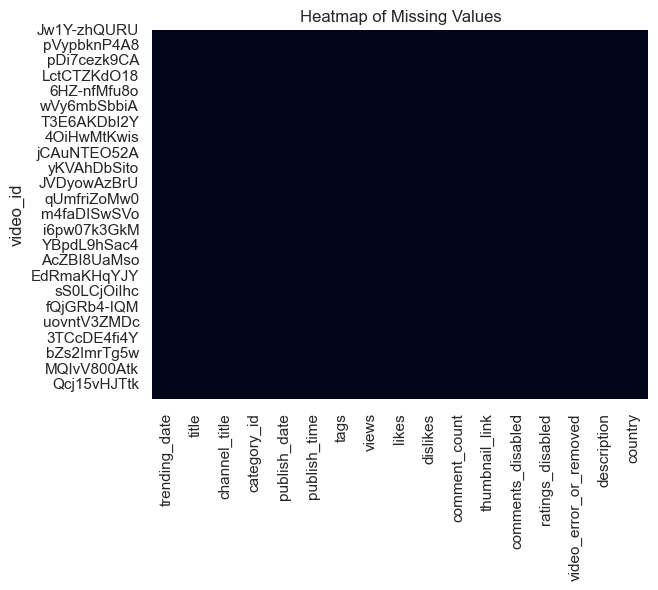

In [92]:
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.title('Heatmap of Missing Values')
    #plt.show()



## Combining Every Dataframe Into One Huge Dataframe

In [93]:
combined_df = pd.concat(all_dataframes)
#print(combined_df.tail())
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375942 entries, SbOwzAl9ZfQ to 4YFo4bdMO8Q
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trending_date           375942 non-null  datetime64[ns]
 1   title                   375942 non-null  object        
 2   channel_title           375942 non-null  object        
 3   category_id             375942 non-null  object        
 4   publish_date            375942 non-null  datetime64[ns]
 5   publish_time            375942 non-null  object        
 6   tags                    375942 non-null  object        
 7   views                   375942 non-null  int64         
 8   likes                   375942 non-null  int64         
 9   dislikes                375942 non-null  int64         
 10  comment_count           375942 non-null  int64         
 11  thumbnail_link          375942 non-null  object        
 12  comments_disabled   

**To further clean and refine the dataset, we will sort the entries by trending_date. This will position the latest trending videos at the top of the dataset, allowing us to focus on current trends in each country, which are more relevant to our analysis.**

In [94]:
# Making copy of original dataframe
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')


combined_df = (combined_df
               .reset_index()
               .sort_values('trending_date', ascending=False)
               .drop_duplicates('video_id',keep='first')
               .set_index('video_id'))


for df in all_dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')


combined_df[['publish_date','publish_time','trending_date', 'country']].head()



,publish_date,publish_time,trending_date,country
video_id,,,,
4YFo4bdMO8Q,2018-05-11,04:06:35,2018-06-14,GB
L_cxNGfEd_0,2018-06-13,10:54:55,2018-06-14,FR
ENVlcPpTuh4,2018-06-13,14:56:22,2018-06-14,KR
5BeWvP521s8,2018-06-12,08:00:02,2018-06-14,KR
nOUlB0i2MaA,2018-06-13,19:10:31,2018-06-14,KR


### Inserting Category Column
As a final step in cleaning the datasets, we examined the associated JSON files to assess their usefulness. Given the presence of multiple files, we randomly selected two to determine whether they contained similar data or differed significantly. This approach allowed us to evaluate the relevance of the JSON data for our analysis.

In [95]:
with open('/Users/apple/myprojects/Trending_Youtube_video/US_category_id.json', 'r') as f: 
    data = f.read()
obj = json.loads(data)
print(json.dumps(obj, indent=4))


{
    "kind": "youtube#videoCategoryListResponse",
    "etag": "\"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM\"",
    "items": [
        {
            "kind": "youtube#videoCategory",
            "etag": "\"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ\"",
            "id": "1",
            "snippet": {
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
                "title": "Film & Animation",
                "assignable": true
            }
        },
        {
            "kind": "youtube#videoCategory",
            "etag": "\"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA\"",
            "id": "2",
            "snippet": {
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
                "title": "Autos & Vehicles",
                "assignable": true
            }
        },
        {
            "kind": "youtube#videoCategory",
            "etag": "\"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg\"",
            "id": "10",
 

In [96]:
category_id = {}

with open('/Users/apple/myprojects/Trending_Youtube_video/DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']

combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))

backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))

for df in all_dataframes:
    df.insert(2, 'category', df['category_id'].map(category_id))

print(combined_df.head(3))

            trending_date                                              title  \
video_id                                                                       
4YFo4bdMO8Q    2018-06-14  KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...   
L_cxNGfEd_0    2018-06-14                CLASSE PAS CLASSE  - PAROLE DE CHAT   
ENVlcPpTuh4    2018-06-14  [ì í2018, íì¸í¡í¡] ìë¬´ë¦¬ ì§ë¬¸ì´...   

                    category   channel_title category_id publish_date  \
video_id                                                                
4YFo4bdMO8Q            Music  SuperDuperKyle          10   2018-05-11   
L_cxNGfEd_0   Pets & Animals  Parole de chat          15   2018-06-13   
ENVlcPpTuh4  News & Politics         MBCNEWS          25   2018-06-13   

            publish_time                                               tags  \
video_id                                                                      
4YFo4bdMO8Q     04:06:35  Kyle|"SuperDuperKyle"|"Ikuyo"|"2 Chainz"|"Soph...

In [97]:
combined_df['category'].unique()

array(['Music', 'Pets & Animals', 'News & Politics', 'Sports', 'Comedy',
       'Film & Animation', 'People & Blogs', 'Entertainment',
       'Howto & Style', 'Education', 'Gaming', nan, 'Autos & Vehicles',
       'Travel & Events', 'Shows', 'Science & Technology', 'Movies',
       'Trailers'], dtype=object)

We refined the dataset into a final DataFrame in preparation for the upcoming EDA section of the project. Both the final DataFrame and the cleaned-up original copy were saved for future use.                                                                                        